# Classification

As always, we will start importing all of the libraries that we know we will need.
There is one new library here called seaborn. It is used for plotting and built on matplotlib. It has some really useful presets that we will be using.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

We will be looking at a dataset about IRIS flowers today, found in **IRIS.csv**

In [59]:
df = pd.read_csv("IRIS.csv")

This dataset includes sepal length and width, along with petal length and width, and the particular species of iris. Here is a helpful digram:

![](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

Let's look at our dataset:

In [60]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Notice that one of our columns, **species**, is catagorical. Since we know this may cause issues, let's go ahead and encode it to be numerical.

In [61]:
df['species_num'] = df['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace=False)

There are a few easy ways we can get a look at how the columns in our dataset are related to each other. First, we can look at it's correlation matrix:

In [62]:
df.tail()
print(df['species_num'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_num, Length: 150, dtype: int64


In [63]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_num
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_num,0.782561,-0.419446,0.949043,0.956464,1.000000


We can also plot what is called a **pairplot**:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


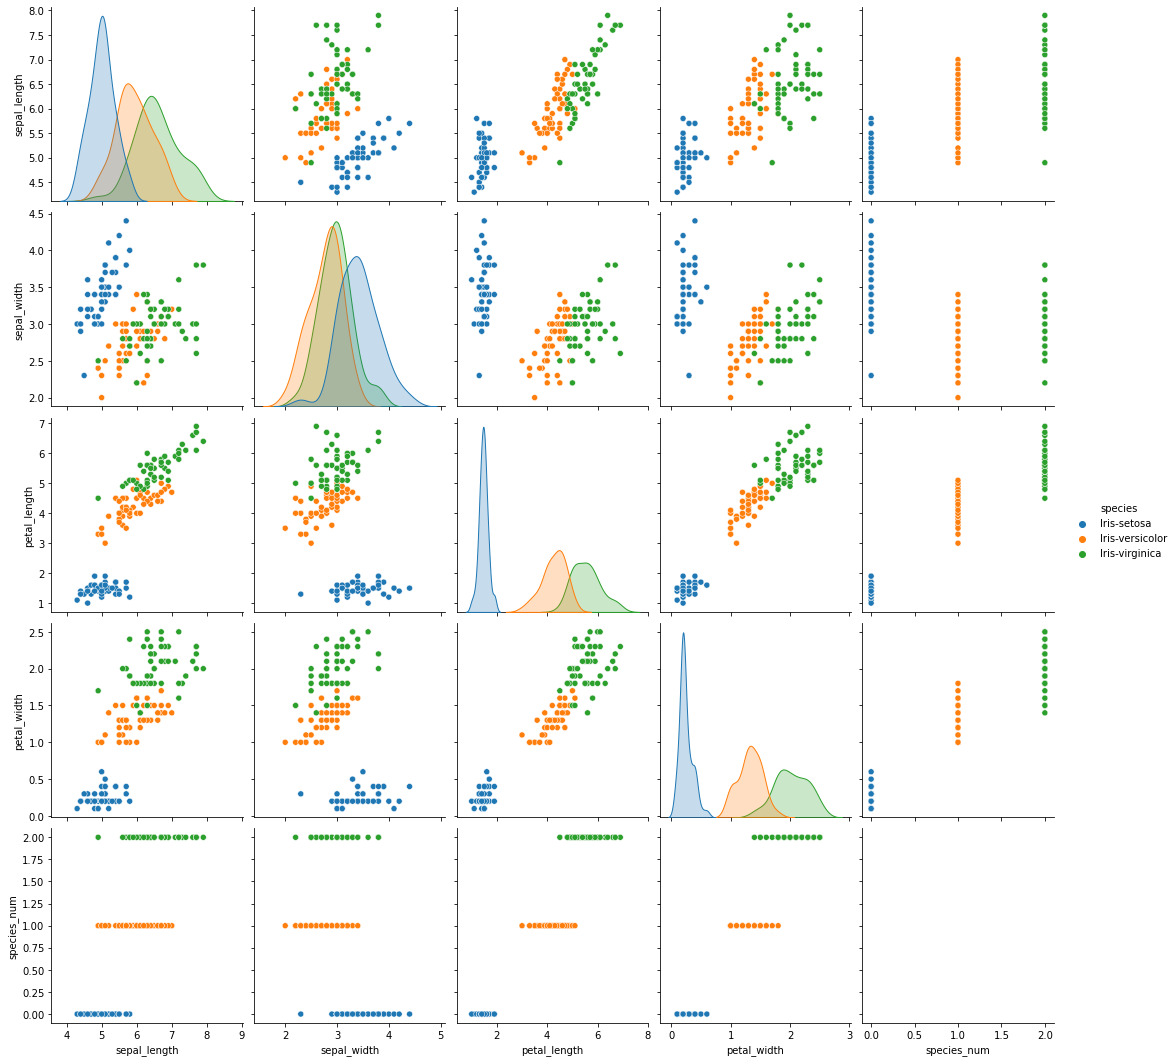

In [64]:
sns.pairplot(df, hue='species', size=3)

## Training and Testing Sets

Let's split our data into training and testing sets using the **train_test_split** function from sklearn.

First we need to import it:

In [65]:
from sklearn.model_selection import train_test_split

Now we can use it to split up our data in an 80:20 ratio.

In [66]:
train, test = train_test_split(df, test_size = 0.2, random_state = 1010)


In [67]:
x = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = train['species'].values
y_num = train['species_num'].values

In [68]:
x_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_test = test['species'].values
y_num_test = test['species_num'].values

In [69]:
print(y_num_test)
print(y_num)

[1 1 0 2 0 1 2 0 1 2 0 1 0 2 1 1 2 1 2 0 2 2 2 0 0 0 0 0 0 0]
[2 1 2 1 1 2 0 0 1 0 2 0 1 1 0 2 2 2 2 2 1 1 0 1 2 0 2 2 2 1 2 2 1 1 2 2 1
 0 2 1 2 0 2 0 2 1 2 2 0 1 2 2 0 0 0 1 1 0 1 1 1 1 2 2 0 2 1 0 0 2 0 2 1 2
 0 1 1 1 0 2 2 0 1 1 0 0 0 0 1 1 0 2 1 0 1 2 0 1 0 2 2 0 0 2 1 2 0 1 1 1 2
 2 1 1 1 1 0 0 0 0]


## Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. 

![](https://media-exp1.licdn.com/dms/image/C5112AQGeaIOJ4uR63g/article-cover_image-shrink_600_2000/0/1572439564210?e=1658966400&v=beta&t=I2zuDNrOXiAP8LUgK_oD1apDwrOdA6QSCLr3vxPVKQ4)

First we need to import **Lasso** from sklearn

In [70]:
from sklearn.linear_model import Lasso

Now we can create and fit the model.

In [71]:
lasso = Lasso(alpha=0.1)
lasso.fit(x, y_num)

Lasso(alpha=0.1)

Then we can go ahead and predict the species type with our model for both the training and testing set.

In [72]:
lasso_train = lasso.predict(x)
lasso_test = lasso.predict(x_test)

We can print the lasso coefficients like this:

In [73]:
print(lasso.coef_)

[ 0.        -0.         0.4070964  0.       ]


Now let's make a pairity plot to visualize the predictions:

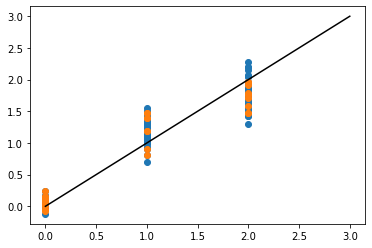

In [74]:
plt.scatter(y_num, lasso_train, label='train')
plt.scatter(y_num_test, lasso_test, label='test')
plt.plot([0,3], [0,3], color='black')

We can also make violin plots to give us a better idea of how many points we are seeing.

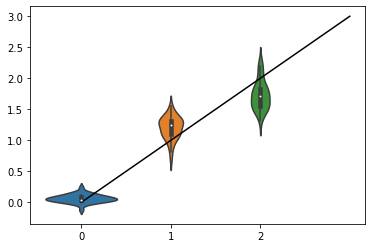

In [75]:
sns.violinplot(x=y_num, y=lasso_train, data=df)
plt.plot([0,3], [0,3], color='black')

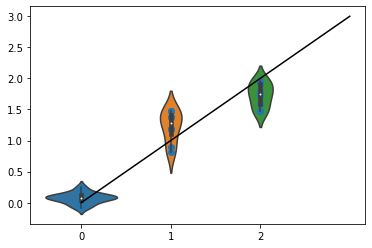

In [76]:
sns.violinplot(x=y_num_test, y=lasso_test, data=df)
plt.scatter(y_num_test, lasso_test, label='train')
plt.plot([0,3], [0,3], color='black')

Now let's look at the mean squared error and r-squared values.

In [77]:
print(mean_squared_error(y_num, lasso_train))
print(r2_score(y_num, lasso_train))
      
print("\n", mean_squared_error(y_num_test, lasso_test))
print(r2_score(y_num_test, lasso_test))

0.07093639711793415
0.8906802099209918

 0.06475344397784046
0.9095060565527074


Now, what happens when we adjust the alpha level in our model? How does this increase or decrease the accuracy?

# K Nearest Neighbors (KNN)

KNN is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

![](https://miro.medium.com/max/753/0*jqxx3-dJqFjXD6FA)

First we need to import **KNeighborsRegressor** from sklearn

In [78]:
from sklearn.neighbors import KNeighborsRegressor

Now we can create and fit the model.

In [79]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x, y_num)

KNeighborsRegressor(n_neighbors=3)

Then we can go ahead and predict the species type with our model for both the training and testing set.

In [80]:
knn_train = knn.predict(x)
knn_test = knn.predict(x_test)


We can print the lasso coefficients like this:

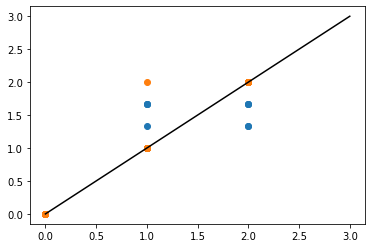

In [81]:
plt.scatter(y_num, knn_train)
plt.scatter(y_num_test, knn_test)
plt.plot([0,3], [0,3], color='black')

Now let's make a pairity plot to visualize the predictions:

We can also make violin plots to give us a better idea of how many points we are seeing.

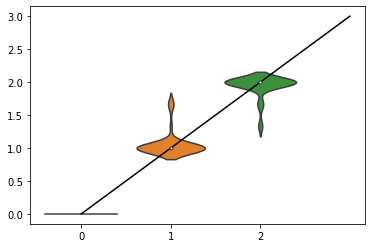

In [82]:
sns.violinplot(x=y_num, y=knn_train)
plt.plot([0,3], [0,3], color='black')

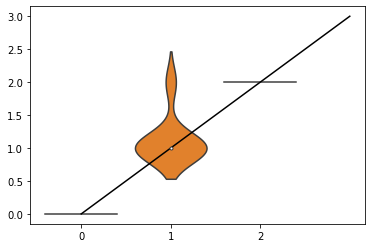

In [83]:
sns.violinplot(x=y_num_test, y=knn_test)
plt.plot([0,3], [0,3], color='black')

Now let's look at the mean squared error and r-squared values.

In [84]:
print(mean_squared_error(y_num, knn_train))
print(r2_score(y_num, knn_train))

print(mean_squared_error(y_num_test, knn_test))
print(r2_score(y_num_test, knn_test))

0.022222222222222223
0.9657534246575342
0.03333333333333333
0.953416149068323


Now, what happens when we adjust the alpha level in our model? How does this increase or decrease the accuracy?

# K Means

K-Means is a type clustering that is a simple unsupervised learning algorithm used to solve clustering problems. It follows a simple procedure of classifying a given data set into a number of clusters, defined by the letter "k," which is fixed beforehand. The clusters are then positioned as points and all observations or data points are associated with the nearest cluster, computed, adjusted and then the process starts over using the new adjustments until a desired result is reached.

![](https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png)

First we need to import **KMeans** from sklearn.

In [85]:
from sklearn.cluster import KMeans 

Now we can create and fit the model.

In [86]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Then we can go ahead and predict the species type with our model for both the training and testing set.

In [87]:
y_kmeans_test = kmeans.fit_predict(x_test)

Additionally we can visualize the clusters and their centers.

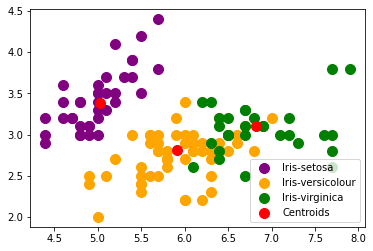

In [88]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Now let's make a pairity plot to visualize the predictions:

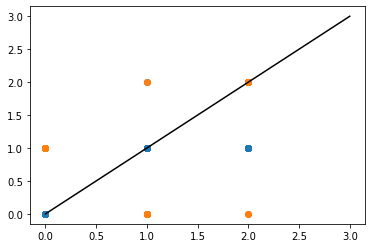

In [89]:
plt.scatter(y_num, y_kmeans)
plt.scatter(y_num_test, y_kmeans_test)
plt.plot([0,3],[0,3], color='black')

We can also make violin plots to give us a better idea of how many points we are seeing.

Now let's look at the mean squared error and r-squared values.

In [90]:
print(mean_squared_error(y_num, y_kmeans))
print(r2_score(y_num, y_kmeans))

0.10833333333333334
0.8330479452054794


Now, what happens when we adjust the alpha level in our model? How does this increase or decrease the accuracy?

# Decision Tree

A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

![](https://www.explorium.ai/wp-content/uploads/2019/12/Decision-Trees-2.png)

First we need to import **tree** from sklearn

In [91]:
from sklearn import tree

In [92]:
dt = tree.DecisionTreeRegressor(max_depth = 4)
dt.fit(x, y_num)

DecisionTreeRegressor(max_depth=4)

In [93]:
train_pred = dt.predict(x)

In [94]:
test_pred = dt.predict(x_test)

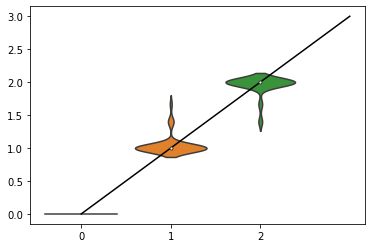

In [95]:
sns.violinplot(x=y_num, y=train_pred, data=df, xlim=[0,3])
plt.plot([0,3], [0,3], color='black')

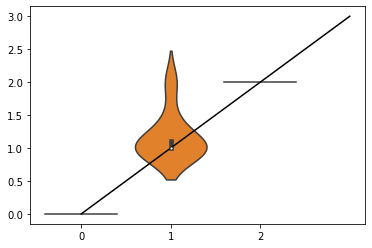

In [96]:
sns.violinplot(x=y_num_test, y=test_pred, data=df, xlim=[0,3])
plt.plot([0,3], [0,3], color='black')

In [102]:
print(mean_squared_error(y_num_test, test_pred))
print(r2_score(y_num_test, test_pred))

print(mean_squared_error(y_num, train_pred))
print(r2_score(y_num, train_pred))

0.03866666666666666
0.9459627329192547
0.015555555555555553
0.976027397260274
